In [1]:
%pylab inline
import pylab as plt

Populating the interactive namespace from numpy and matplotlib


In [2]:
import geopandas as gp
import pandas as pd
from shapely.ops import cascaded_union

In [3]:
buffers = gp.read_file('../data/real/circles_simple.geojson')

In [4]:
b2 = buffers.groupby('office_id').agg({'geometry': lambda x: cascaded_union(x)})
b2.reset_index(inplace=1)

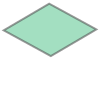

In [5]:
b2.loc[1, 'geometry']

In [6]:
b2 = gp.GeoDataFrame(b2)

In [51]:
def get_intersect(gs, id_col='office_id'):

    col = gs[[id_col, 'geometry']]
    col['dummy'] = 1
    c = col.merge(col, on='dummy', how='left')
    c = c[c[id_col+'_x']!=c[id_col+'_y']] # drop self-comparison
    cs1 = c[[(id_col+ '_x'), 'geometry_x']].rename(columns={'geometry_x': 'geometry'})
    cs2 = c[['geometry_y']].rename(columns={'geometry_y': 'geometry'})
    cs1 = gp.GeoDataFrame(cs1)
    cs2 = gp.GeoDataFrame(cs2)
    
    cs1['intersects'] = cs1.intersects(cs2)
    nc = id_col + '_x'
    result = cs1[[nc, 'intersects']].groupby(id_col + '_x').any()
    
    return result.ix[:,0].values

In [54]:
result = get_intersect(b2)

In [60]:
print result.shape
print result.sum()

(2391,)
2371


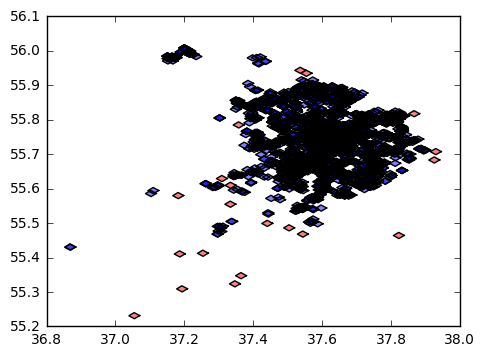

In [63]:
ax = b2[~result].plot(color='red')
b2[result].plot(color='blue', ax=ax)